In [21]:
#General libraries
##################

import pandas as pd
import numpy as np
from numpy import mean


#Plotting libraries
##################

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sbn
from pandas.plotting import autocorrelation_plot
from pandas import Series
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

#Libraries/functions for General Modelling, metrics, etc..
###############################################

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Libraries/functions for Modelling ARIMA
#######################################


from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima.model import ARIMAResults

import statsmodels.api as sm
import pmdarima as pm


#Other Support Libraries/functions
#################################

import warnings
import itertools
import datetime
from math import sqrt

warnings.filterwarnings("ignore")

In [22]:
#Opening poc dataframe with AirStation 16 data
#############################################

poc_16 = pd.read_csv ("../data/processed/poc_16.csv", sep= ',')
poc_16.index = poc_16.TIME
poc_16 = poc_16[["NO2_index"]]
poc_16.head()

,NO2_index
TIME,
2019-01-01 00:59:59,53.0
2019-01-01 01:59:59,44.0
2019-01-01 02:59:59,54.0
2019-01-01 03:59:59,43.0
2019-01-01 04:59:59,42.0


In [25]:
# 1,1,2 ARIMA Model


model = sm.tsa.arima.ARIMA(poc_16.NO2_index, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              NO2_index   No. Observations:                23376
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -88306.951
Date:                Sun, 28 Nov 2021   AIC                         176621.902
Time:                        12:51:26   BIC                         176654.140
Sample:                    01-01-2019   HQIC                        176632.370
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7700      0.003    258.719      0.000       0.764       0.776
ma.L1         -0.6753      0.003   -240.760      0.000      -0.681      -0.670
ma.L2         -0.3043      0.002   -140.965      0.0

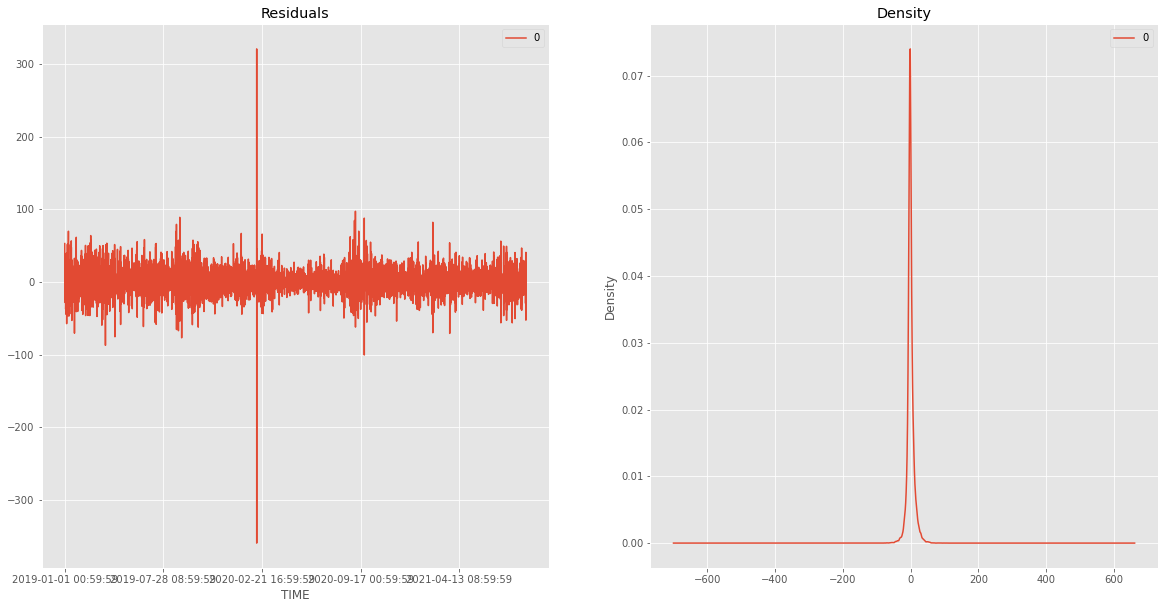

In [26]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

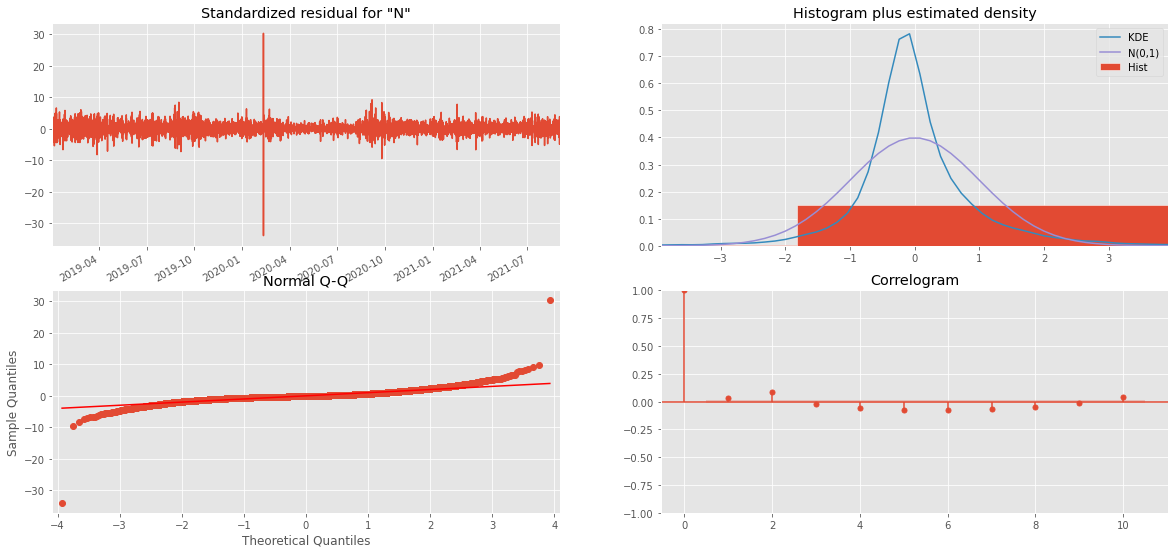

In [28]:
# Actual vs Fitted
model_fit.plot_diagnostics()
plt.show()

In [30]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = poc_16.NO2_index[:85]
test = poc_16.NO2_index[85:]

In [ ]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()